In [239]:
import pandas as pd
import numpy as np

# Load the data

x_train = pd.read_csv('CompleteDataSet/x_train_all.csv')  
y_train = pd.read_csv('CompleteDataSet/y_train_all.csv')
x_test = pd.read_csv('CompleteDataSet/x_test_all.csv')  
y_test = pd.read_csv('CompleteDataSet/y_test_all.csv')


### Part 1 pre-processing

In [3]:
# uses isolation forest algorithm to find outliers
from sklearn.ensemble import IsolationForest

# TODO
feature_names = [f'feature_{str(col)}' for col in x_train.columns]
x_train_copy = x_train.copy()
x_train_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(x_train_copy)

outlier_indices = x_train_copy.index[outliers == -1]

x_train_no_outliers = x_train_copy.drop(outlier_indices)
x_train_no_outliers.to_csv('x_train_no_outliers.csv',index=False)

outlier_indices_df = pd.DataFrame({'outlier_index': outlier_indices})

outlier_indices_df.to_csv('outlier_indices.csv', index=False)

In [4]:
# We perform z-normalization on our dataset

mean=x_train.mean()
std=x_train.std()
x_train_norm=(x_train-mean)/std
x_train_norm

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,-0.150391,-0.162019,-0.172510,-0.097637,-0.036321,0.027779,0.183130,0.376504,0.348157,0.382097,...,0.225873,0.109515,0.009264,0.083321,0.205589,0.404792,0.477724,0.472859,0.432739,0.418963
1,-0.214889,-0.187848,-0.133726,-0.149251,-0.178371,-0.192203,-0.011458,0.220825,0.555781,0.446901,...,0.363553,0.323454,0.208034,0.098671,-0.010174,0.063867,0.228791,0.504208,0.527321,0.529189
2,-0.227789,-0.187848,-0.133726,-0.162154,-0.113803,-0.011041,0.196103,0.246771,-0.054114,-0.006728,...,0.394149,0.354016,0.253904,0.144723,0.051472,0.032874,0.088767,0.190725,0.338157,0.434710
3,-0.292287,-0.252422,-0.198367,-0.123444,0.041161,0.221881,0.260966,0.078119,-0.274715,0.122880,...,0.608317,0.308172,0.238614,0.175424,0.113119,0.048370,0.026534,0.065332,0.212048,0.324484
4,-0.201990,-0.200763,-0.211295,-0.226672,-0.165458,-0.036921,0.183130,0.246771,-0.080067,-0.097454,...,0.424744,0.399861,0.422093,0.451734,0.452175,0.311812,0.151000,-0.028713,0.007120,0.072541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,2.029654,1.684798,2.128704,1.592712,0.506053,1.528831,2.129016,2.140865,2.138915,2.131807,...,-0.569611,-0.654553,-0.678785,-0.684207,-0.688287,-0.710962,-0.720262,-0.655679,-0.654953,-0.636050
9686,0.791285,0.367488,2.128704,2.134657,2.133176,2.137016,2.129016,2.127892,2.125938,2.092924,...,-0.539015,-0.623990,-0.632915,-0.622805,-0.611229,-0.602486,-0.611354,-0.655679,-0.623425,-0.636050
9687,2.132851,2.136816,2.141633,2.134657,2.133176,2.137016,2.141989,2.140865,2.138915,2.131807,...,-0.477824,-0.348926,-0.449436,-0.530701,-0.564994,-0.509506,-0.455772,-0.577308,-0.450025,-0.384107
9688,2.132851,2.110986,2.141633,2.134657,2.133176,2.137016,2.141989,2.140865,2.138915,2.131807,...,-0.523717,-0.685116,-0.694075,-0.668856,-0.534170,-0.633479,-0.642471,-0.655679,-0.654953,-0.683289


In [208]:
import matplotlib.pyplot as plt
import seaborn as sns


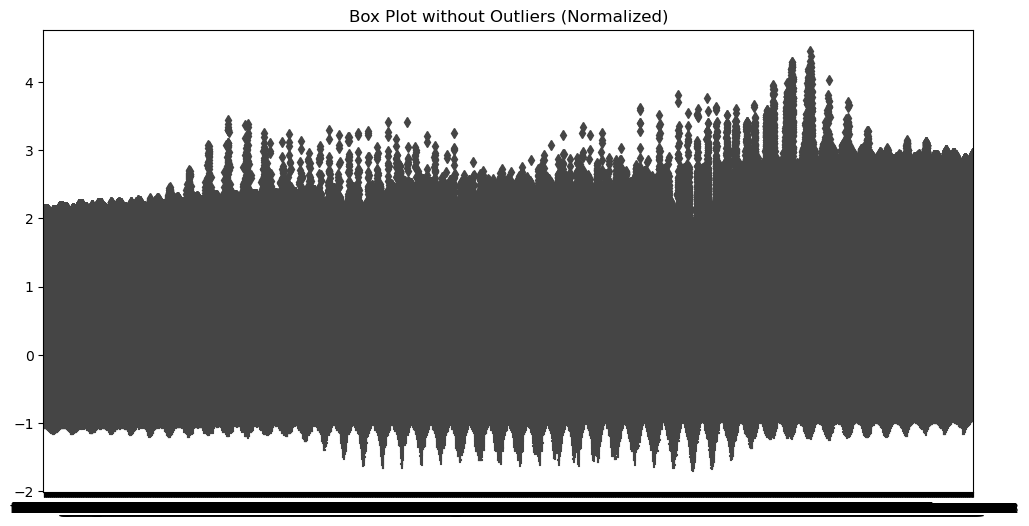

In [6]:
# On the normalized dataset, we run another isolation forest model to detect outliers from it.

x_train_norm.columns = feature_names

x_train_norm_copy = x_train_norm.copy()
contamination = 0.41
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(x_train_norm_copy)

outlier_indices = x_train_norm_copy.index[outliers == -1]

x_train_no_outliers_norm = x_train_norm_copy.drop(outlier_indices)
x_train_no_outliers_norm.to_csv('x_train_no_outliers_norm.csv')
plt.figure(figsize=(12, 6))

sns.boxplot(data=x_train_no_outliers_norm)
plt.title('Box Plot without Outliers (Normalized)')
plt.show()

outlier_indices_df = pd.DataFrame({'outlier_index_norm': outlier_indices})
outlier_indices_df.to_csv('outlier_indices_norm.csv', index=False)

In [7]:
df_x_train_no_outliers=pd.read_csv('x_train_no_outliers.csv')
df_x_train_no_outliers_norm=pd.read_csv('x_train_no_outliers_norm.csv')


In [8]:
# applies outlier mining to y train

# loads the indices to be removed from each dataset
indices_to_remove = pd.read_csv('outlier_indices.csv')
indices_to_remove_norm = pd.read_csv('outlier_indices_norm.csv')

# removes outliers from y train
y_train_filtered_outlier = y_train[~y_train.index.isin(indices_to_remove['outlier_index'])]

# removes outliers found after normalizing from y train
y_train_filtered_outlier_norm = y_train[~y_train.index.isin(indices_to_remove_norm['outlier_index_norm'])]

# saves to csv for future use
y_train_filtered_outlier.to_csv('y_train_filtered_outlier.csv')
y_train_filtered_outlier_norm.to_csv('y_train_filtered_outlier_norm.csv')

In [9]:
# load y train without outliers
y_train_filtered_outlier=pd.read_csv('y_train_filtered_outlier.csv')
y_train_filtered_outlier_norm=pd.read_csv('y_train_filtered_outlier_norm.csv')

# drop previous indices
y_train_filtered_outlier.drop('Unnamed: 0',axis=1, inplace=True)
y_train_filtered_outlier_norm.drop('Unnamed: 0',axis=1, inplace=True)

In [209]:
import cv2

In [10]:

data = x_train.iloc[1:9690]
x_train.iloc[:1]
image_data = np.array(data, dtype=np.uint8)

equalized_image = cv2.equalizeHist(image_data)

In [11]:
# defines functions for pre-processing

# applies dynamic contrasting to images based on their histograms
def apply_clahe(row):
    row = np.array(row, dtype=np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_row = clahe.apply(row)
    return equalized_row

# dynamically brightens images based on their pixel distribution
def brighten(row, target_mean_brightness=128, max_brightness_adjustment=50):
    current_mean_brightness = np.mean(row)
    brightness_adjustment = target_mean_brightness - current_mean_brightness
    brightness_adjustment = np.clip(brightness_adjustment, -max_brightness_adjustment, max_brightness_adjustment)
    scaling_factor = (current_mean_brightness + brightness_adjustment) / current_mean_brightness
    adjusted_row = row * scaling_factor
    adjusted_row[adjusted_row < 0] = 0
    adjusted_row[adjusted_row > 255] = 255
    return adjusted_row

# makes dark areas darker and light areas lighter, accentuates the image
def apply_gamma_correction(row, gamma=1.8):
    input_shape = row.shape
    row = np.array(row, dtype=np.uint8)
    corrected_row = ((row / 255.0) ** (1 / gamma) * 255).astype(np.uint8)
    corrected_row = corrected_row.reshape(*input_shape) 
    return corrected_row

def add_noise(row, noise_level=20):
    row = row + noise_level * np.random.randn(*row.shape)
    row[row < 0] = 0
    row[row > 255] = 255
    return row

# blurs using a gaussian function
def apply_gaussian_blur(row, kernel_size=(5, 5), sigma=0):
    row = np.array(row, dtype=np.uint8)
    row = cv2.GaussianBlur(row, kernel_size, sigma)
    return row

In [12]:
x_copy = x_train.copy()


In [13]:
# pre-processing images with the functions above (excl. noise and blur). we do the following without applying noise and blurring 
# as our feature selection yields a higher accuracy when fed the dataset without noising and gaussian blurring.

processed_images = []

for i, idx in enumerate(x_copy.index):
    original_image = x_copy.iloc[idx].values.reshape(48, 48)
    brightened_image = brighten(x_copy.iloc[idx].values).reshape(48, 48)
    gamma_image = apply_gamma_correction(brightened_image)
    equalized_image = apply_clahe(gamma_image)
    processed_images.append(equalized_image.flatten())

processed_df_old = pd.DataFrame(processed_images)
processed_df_old.shape

(9690, 2304)

In [14]:
# pre-processing images with the functions above
processed_images = []

for i, idx in enumerate(x_copy.index):
    original_image = x_copy.iloc[idx].values.reshape(48, 48)
    brightened_image = brighten(x_copy.iloc[idx].values).reshape(48, 48)
    gamma_image = apply_gamma_correction(brightened_image)
    noisy_image = add_noise(gamma_image)
    gaussian_image = apply_gaussian_blur(noisy_image)
    equalized_image = apply_clahe(gaussian_image)

    processed_images.append(equalized_image.flatten())

processed_df = pd.DataFrame(processed_images)
processed_df.shape

(9690, 2304)

In [15]:
processed_df.to_csv("processed_df.csv", index=True)

In [16]:
image_data = np.array(data, dtype=np.uint8)
processed_data = np.array(processed_df.iloc[1:9593], dtype=np.uint8)

In [17]:
processed_df_p1 = processed_df

### Part 2 Pre-Processing

In [210]:
x_train = pd.read_csv('CompleteDataSet/x_train_all.csv')  
y_train = pd.read_csv('CompleteDataSet/y_train_all.csv')

In [211]:
# Grayscale to pseudo-infrared conversion function.

def grayscale_to_infrared(grayscale_image):
    # Convert the input grayscale image to a NumPy array with a data type of uint8.
    row = np.array(grayscale_image, dtype=np.uint8)

    # Define a color map for mapping grayscale values to a color representation.
    color_map = plt.get_cmap('hot')

    # Normalize the grayscale image to the range [0, 1].
    normalized_image = row / 255.0

    # Apply the color map to the normalized image and extract the red channel (infrared representation).
    infrared_image = (color_map(normalized_image)[:, :, 0] * 255).astype(np.uint8)

    # Flatten the resulting infrared image to obtain a 1D array.
    return infrared_image.flatten()

In [212]:
infrared_original = []

# Loop through the indices and values in the 'x_train' DataFrame.
for i, idx in enumerate(x_train.index):
    # Extract the grayscale image from the DataFrame and reshape it to 48x48 dimensions.
    original_image = x_train.iloc[idx].values.reshape(48, 48)

    # Convert the grayscale image to an infrared-like representation using the 'grayscale_to_infrared' function.
    infrared_image = grayscale_to_infrared(original_image)

    # Append the resulting infrared image to the 'infrared_original' list.
    infrared_original.append(infrared_image)

# Create a DataFrame 'infrared_df_org' from the list of infrared images.
infrared_df_org = pd.DataFrame(infrared_original)

# Get the shape of the resulting DataFrame to see the dimensions.
infrared_df_org.shape

(9690, 2304)

In [213]:
infrared_data = infrared_df_org.to_numpy()


In [214]:
from sklearn.ensemble import IsolationForest

# Outlier Mining using Isolation Forest

feature_names = [f'feature_{str(col)}' for col in x_train.columns]
infrared_copy = x_train.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_no_outliers = infrared_copy.drop(outlier_indices)

y_train = y_train.drop(outlier_indices)

In [215]:
# Normalizing the Infrared Data without outliers

mean=infra_no_outliers.mean()
std=infra_no_outliers.std()
infra_norm=(infra_no_outliers-mean)/std

In [216]:
# Normalizing x_train

mean=x_train.mean()
std=x_train.std()
x_norm=(x_train-mean)/std

In [217]:
# Converting every image from the normalized x_train to pseduo-infrared images.

infrared_original = []

for i, idx in enumerate(x_norm.index):
    original_image = x_norm.iloc[idx].values.reshape(48, 48)
    infrared_image = grayscale_to_infrared(original_image)
    infrared_original.append(infrared_image)

infrared_df_norm = pd.DataFrame(infrared_original)
infrared_df_norm.shape

(9690, 2304)

In [218]:
from sklearn.ensemble import IsolationForest

# Outlier Mining using Isolation Forest on the Normalized Infrared Data

feature_names = [f'feature_{str(col)}' for col in infrared_df_norm.columns]
infrared_copy = infrared_df_norm.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_norm_no_outliers = infrared_copy.drop(outlier_indices)

In [219]:
import cv2

# Function to apply Gaussian blur to an input image
def apply_gaussian_blur(row, kernel_size=(5, 5), sigma=0):
    # Convert the input image to a NumPy array with a data type of uint8.
    row = np.array(row, dtype=np.uint8)

    # Apply Gaussian blur to the image with the specified kernel size and sigma.
    row = cv2.GaussianBlur(row, kernel_size, sigma)

    return row

# Function to apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to an input image
def apply_clahe(row):
    # Convert the input image to a NumPy array with a data type of uint8.
    row = np.array(row, dtype=np.uint8)

    # Create a CLAHE object with specific parameters (clipLimit and tileGridSize).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Apply CLAHE to the image to enhance local contrast.
    equalized_row = clahe.apply(row)

    return equalized_row

In [220]:
infrared_prep = []

# Apply the above functions to each image in the infra_norm_no_outliers DataFrame.

for index, row in infra_norm_no_outliers.iterrows():
    image_data = row.values
    gaussian_image = apply_gaussian_blur(image_data)
    equalized_image = apply_clahe(gaussian_image)
    infrared_prep.append(equalized_image.flatten())

prepped_infrared_df = pd.DataFrame(infrared_prep)
prepped_infrared_df.shape

(9593, 2304)

In [221]:
image_df = prepped_infrared_df.copy()

In [222]:
# Create a list to store the Fourier Transformed images
fourier_transformed_images = []

# Iterate through each row (image) in the DataFrame
for index, row in image_df.iterrows():
    # Convert the row (image) to a NumPy array
    image = row.values.reshape(48, 48)

    # Apply DFT to the image
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero frequency components to the center
    dft_shifted = np.fft.fftshift(dft)

    # Calculate the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])

    # Flatten the magnitude spectrum to 1D
    flattened_magnitude_spectrum = magnitude_spectrum.flatten()

    # Append the flattened magnitude spectrum to the list
    fourier_transformed_images.append(flattened_magnitude_spectrum)

fourier_df = pd.DataFrame(fourier_transformed_images)

In [223]:
image_df = prepped_infrared_df.copy()

In [224]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data using MinMaxScaler.

scaler = MinMaxScaler()
scaled_data_normalized = scaler.fit_transform(image_df)

In [225]:
# Function to apply a median filter to an input image
def apply_median_filter(image, kernel_size=37):
    # Apply a median filter to the image with the specified kernel size.
    return cv2.medianBlur(image, kernel_size)

# Function to apply Gaussian blur to an input image using OpenCV
def apply_gaussian_blur_cv(image, kernel_size=(15, 15)):
    # Apply Gaussian blur to the image with the specified kernel size.
    return cv2.GaussianBlur(image, kernel_size, 0)

# Function to apply bilateral filter to an input image
def apply_bilateral_filter(image, diameter=25, sigma_color=75, sigma_space=75):
    # Apply a bilateral filter to the image with the specified parameters (diameter, sigma_color, and sigma_space).
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

In [226]:
image_df = prepped_infrared_df.copy()
infrared_prep2 = []

# Apply the above functions to each image in the pre-processed pseudo-infrared DataFrame.

for index, row in image_df.iterrows():
    image_data = row.values
    median_image = apply_median_filter(image_data)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    median_image = apply_median_filter(gaussian_image)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    infrared_prep2.append(gaussian_image.flatten())

prepped_infrared_df2 = pd.DataFrame(infrared_prep2)
prepped_infrared_df2.shape

(9593, 2304)

In [227]:
pd.DataFrame(prepped_infrared_df2).to_csv("prepped_infrared_df2.csv")

In [228]:
from sklearn.random_projection import GaussianRandomProjection

# Copy the data from 'prepped_infrared_df2' into 'data_df'
data_df = prepped_infrared_df2.copy()

# Create a GaussianRandomProjection model with 1000 components
rp = GaussianRandomProjection(n_components=1000)

# Apply Gaussian random projection to the data, resulting in 'reduced_data'
reduced_data = rp.fit_transform(data_df)

In [229]:
iso_df = prepped_infrared_df2.copy()

In [230]:
# Repeat the same process with 2 components instead this time.

from sklearn.manifold import Isomap


isomap = Isomap(n_components=2)
iso_data = isomap.fit_transform(iso_df)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\mujta\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [231]:
# Define a function to intensify image data based on percentiles
def lp_intensify(arr, lower_percentile, upper_percentile):
    # Calculate the lower and upper intensity limits based on percentiles
    lower_limit = np.percentile(arr, lower_percentile)
    upper_limit = np.percentile(arr, upper_percentile)
    
    # Set values in 'arr' below the lower limit to 0 and values above the upper limit to 255
    arr[arr < lower_limit] = 0
    arr[arr > upper_limit] = 255
    
    return arr

# Copy data from 'iso_data' into 'data'
data = iso_data.copy()

# Intensify the data using the 'lp_intensify' function with lower and upper percentiles of 87 and 90
lower_frequency_data = lp_intensify(data, 87, 90)

In [232]:
lower_frequency_data.shape

(9593, 2)

In [233]:
pd.DataFrame(lower_frequency_data).to_csv("processed_df2.csv")

In [234]:
data.size

19186

In [235]:
processed_df_p2 = pd.DataFrame(lower_frequency_data)

In [236]:
iso_df.shape

(9593, 2304)

### Making Split

In [3]:
import pandas as pd

In [4]:
x_train = pd.read_csv('CompleteDataSet/x_train_all.csv')  
y_train = pd.read_csv('CompleteDataSet/y_train_all.csv')
x_test = pd.read_csv('CompleteDataSet/x_test_all.csv')  
y_test = pd.read_csv('CompleteDataSet/y_test_all.csv')


In [354]:
import numpy as np
# x,y_train/test_data needs to be in DataFrame type
def doMove(percent, X_train_data ,y_train_data ,X_test_data, y_test_data):
# Get number of data points to move based on percentage
    num_datapoints = (percent * len(X_train_data))/100
# Randomize indices to select data points to moved
    random_order = np.arange(len(X_train_data))
    np.random.shuffle(random_order)
# Shuffle X_train_data and y_train_data based on random order indices
    randomized_data  = np.array(X_train_data)[random_order]
    randomized_labels = np.array(y_train_data)[random_order]
# Select the first 'num_datapoints' from the randomized datapoints and labels and create new arrays
    moved_test_data = randomized_data[:int(num_datapoints)]
    moved_test_labels = randomized_labels[:int(num_datapoints)]

# Concatenate the new arrays to x_test and y_test.
# This moves the specified percentage of datapoints from the train to the test set.
    new_test_data = np.concatenate([np.array(x_test),moved_test_data])
    
    new_test_labels = np.concatenate([np.array(y_test),moved_test_labels])
# Remove the split data points from the original train sets and save the new set in arrays
    new_train_data = randomized_data[int(num_datapoints):]
    new_train_labels = randomized_labels[int(num_datapoints):]
# Return the new train and test sets as dataframes
    return pd.DataFrame(new_train_data),pd.DataFrame(new_train_labels),pd.DataFrame(new_test_data),pd.DataFrame(new_test_labels)
    


In [356]:
X,y,Xt,yt = doMove(30,x_train,y_train,x_test,y_test)

In [357]:
X.shape

(6783, 2304)

In [363]:
X.isnull()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6778,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6779,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6780,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6781,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [364]:
y.shape

(6783, 1)

In [365]:
y.isnull()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6778,False
6779,False
6780,False
6781,False


In [366]:
Xt.shape

(5997, 2304)

In [367]:
Xt.isnull()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [368]:
yt.shape

(5997, 1)

In [369]:
yt.isnull()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5992,False
5993,False
5994,False
5995,False


In [16]:
from sklearn.model_selection import train_test_split

def makeSplit(perc, x_train,y_train,x_test,y_test):

    

    X,Xt,y,yt = train_test_split(x_train,y_train,train_size=((100-perc)/100))

    print(x_test.shape)
    print(Xt.shape)
    merged_data = pd.concat([x_test,Xt], axis=0)
    merged_label = pd.concat([y_test,yt], axis=0)

    return X,y,merged_data,merged_label


In [17]:
X,y,Xt,yt = makeSplit(30,x_train,y_train,x_test,y_test)

(3090, 2304)
(2907, 2304)


In [18]:
X.shape

(6783, 2304)

In [21]:
Xt.shape

(5997, 2304)

In [22]:
y.shape

(6783, 1)

In [23]:
yt.shape

(5997, 1)

In [28]:
yt

,0
0,1
1,4
2,6
3,7
4,4
...,...
7411,4
309,1
7187,4
3721,2


### Visualisations

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

import numpy as np


In [249]:
model = DecisionTreeClassifier()

In [270]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

def visualise(model,xdata,ydata,xtest,ytest,heatMap=False,treePlot=False):
    # fit dataset on model
    model.fit(xdata, ydata)

    # get predicted labels
    y_pred = model.predict(xtest)
    # get list of class labels
    labels = list(np.unique(np.array(ydata)))
    # If heatMap is to be plotted
    if(heatMap==True):
        conf_matrix = confusion_matrix(ytest, y_pred)
        
        # Plot the confusion matrix heatmap
        plt.figure(figsize=(10, 10))
        sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Labels")
        plt.ylabel("Actual Labels")
        plt.show()

    # If Decision Tree is to be plotted
    if (treePlot==True):
        plt.figure(figsize=(12, 12))
        plot_tree(model, filled=True, feature_names=list(xdata.columns), class_names=[str(i) for i in labels], rounded=True)
        plt.title("Decision Tree Classifier")
        plt.show()
    

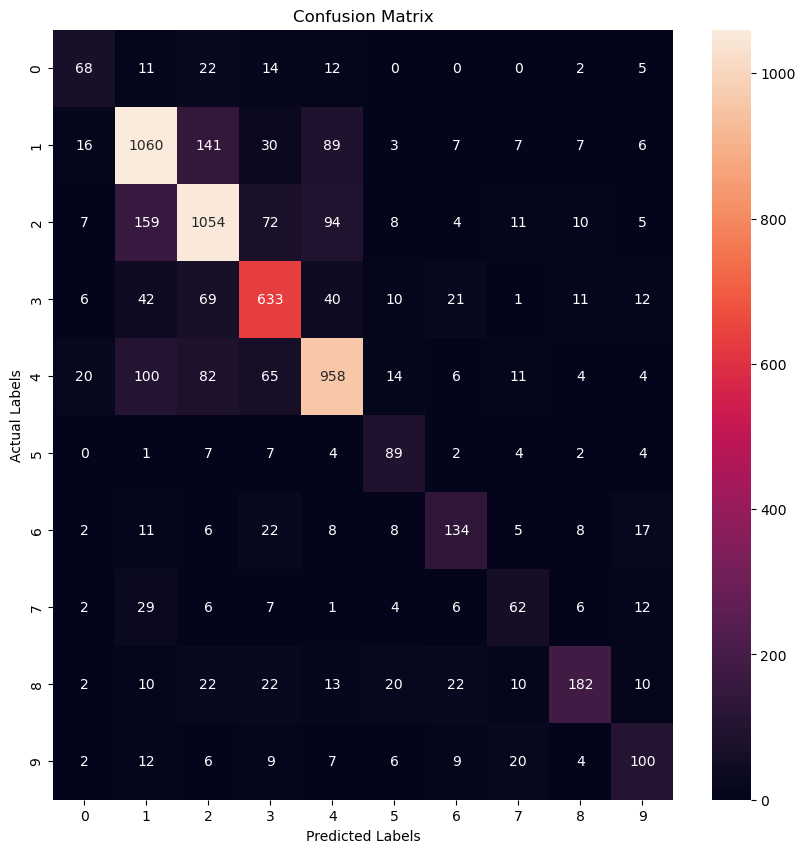

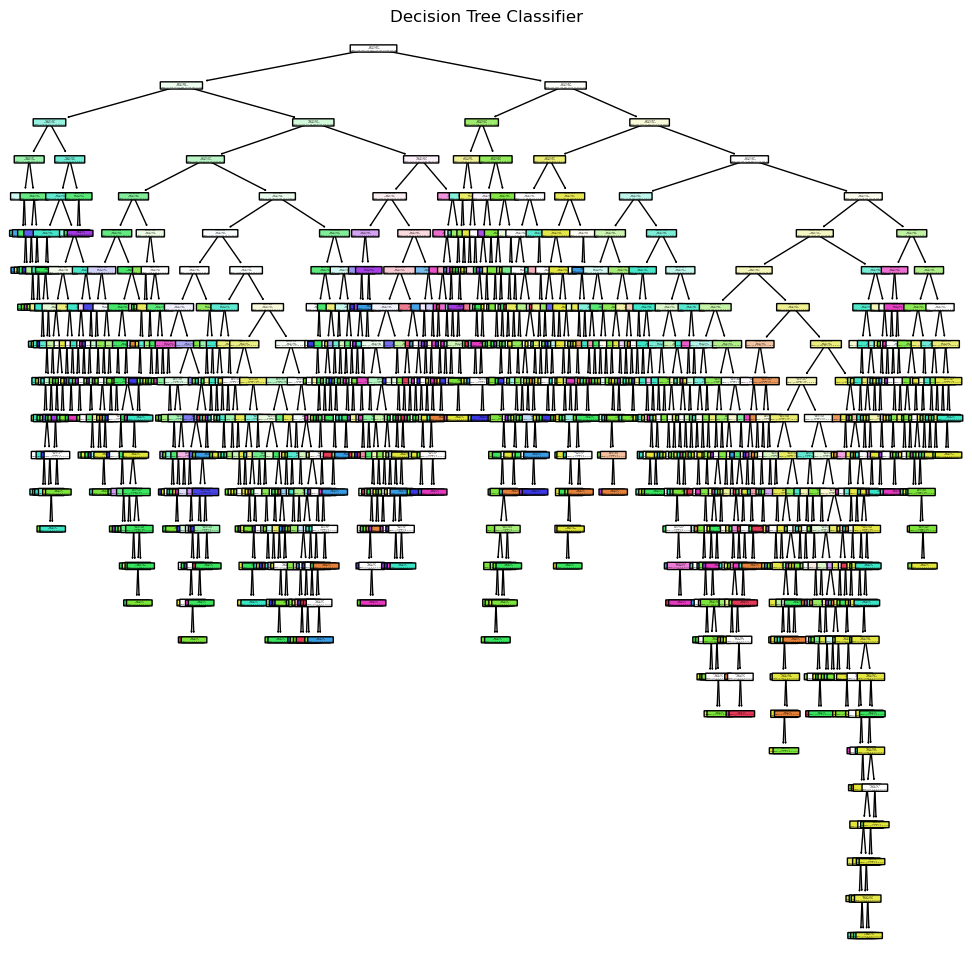

In [271]:
# get visualisations for 30 % moved dataset
visualise(model,X,y,Xt,yt,treePlot=True,heatMap=True)

### performing stratification

In [267]:
# function to reduce number of samples from each class and get equal number of samples from each
def stratifyData(num_samples,xtrain, ytrain):
    # create copy of training labels
    y_cop = y
    y_cop.rename(columns={'0': 'label'},inplace=True)

    # convert labels df into array
    labels = np.array(y_cop)
    # initialise dictionary to count number of data points in each class
    class_counts = {}
    # get number of data points in each class and update dictionary
    for label in labels:
        
        if label[0] in class_counts:
            class_counts[label[0]] = class_counts[label[0]] + 1
        else:
            class_counts[label[0]] = 1
            
    # Find the class with minimum datapoints
    min_class = min(class_counts, key=class_counts.get)

    # Get the minimum value
    min_value = class_counts[min_class]

    samples_to_select = min(min_value,num_samples)
    # Initialize arrays to store the stratified subsample
    X_stratified = np.empty((0, X.shape[1]))
    y_stratified = np.empty((0,1))

    # Iterate over unique classes
    for class_num in np.unique(y):
        # get indices where class label is equal to current class label
        indices = np.where(y == class_num)[0]     
        
        # from xtrain and ytrain get the first 'samples_to_select' number of samples and concatenate the stratified array
        X_stratified = np.concatenate([X_stratified, np.array(xtrain)[indices[:samples_to_select]]])
        y_stratified = np.concatenate([y_stratified, np.array(ytrain)[indices[:samples_to_select]]])
    # return stratified arrays
    return X_stratified,y_stratified



c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


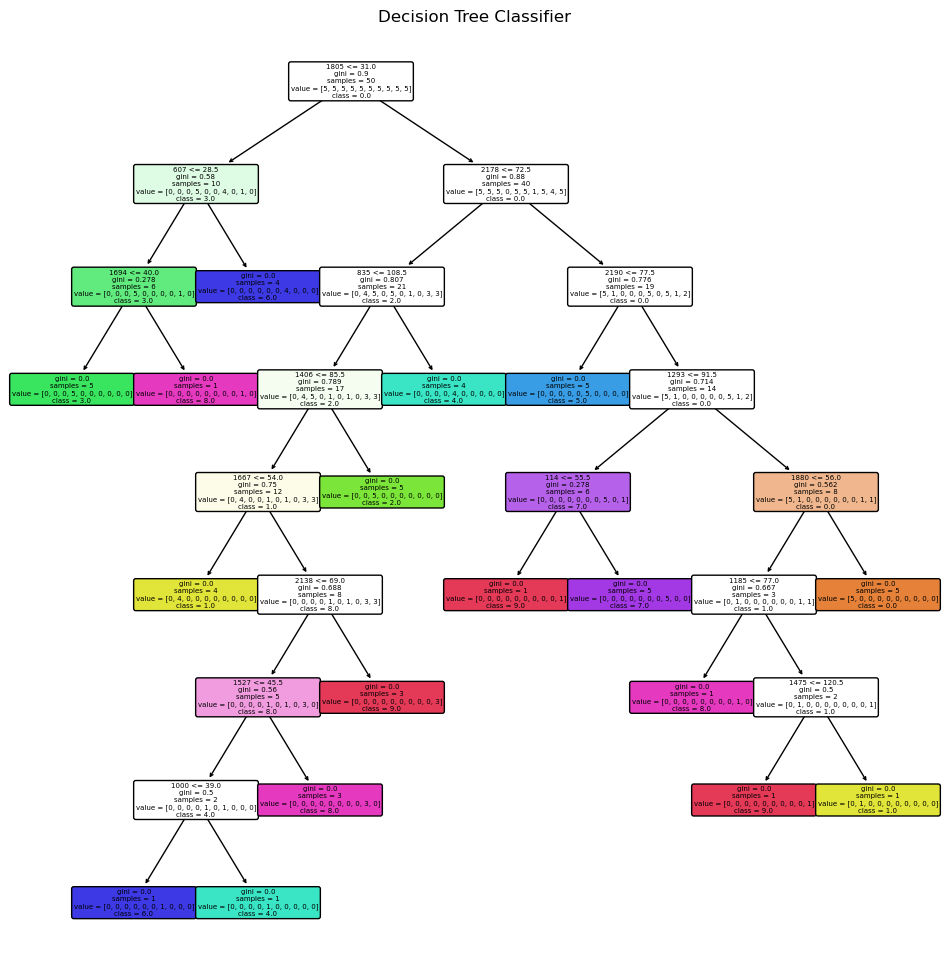

In [274]:
# obtain stratified arrays with 5 samples from each class
x_strat , y_strat = stratifyData(5,X,y)
# get tree visualisation (only treePlot is set to true)
visualise(model,pd.DataFrame(x_strat),pd.DataFrame(y_strat),Xt,yt,treePlot=True)
